# Exam project "Hands-on machine learning"

## Project description:

## Dataset reference:
> P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.<br>
> Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.<br>

[Wine Quality Data Set - Download from UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality)

## Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


## Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

[Source](https://archive.ics.uci.edu/ml/datasets/wine+quality)


### Library import and envirnment setup

In [ ]:
%conda install imbalanced-learn

In [ ]:
%matplotlib

In [123]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import os
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve


### Import Dataset

In [124]:
white_wine = pd.read_csv(".\DataSet\winequality-white.csv", sep=";",quotechar='"')

# red_wine = pd.read_csv(".\DataSet\winequality-red.csv", sep=";",quotechar='"')


### Dataset esploration

In [125]:
white_wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [126]:
white_wine.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [127]:
white_wine.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


### Setting up some printing variables

In [128]:
plot.rcParams.update({"font.size": 8, "figure.figsize": (10, 8)}) # increase font and image size in plot

sns.set(font_scale=1.1) # increase font in seaborn

# colour = "tab20"
# colour = "tab20c"
# colour = "Pastel2"
# colour = "Paired" # <- print
colour = "Spectral"
# colour ="nipy_spectral_r" # <- Print/plot


### Print Histogram

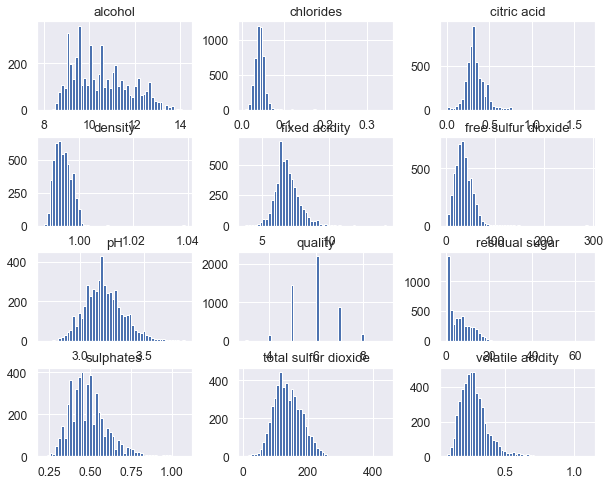

In [129]:
img = white_wine.hist(bins=50)

plot.show()


### Print Heatmap

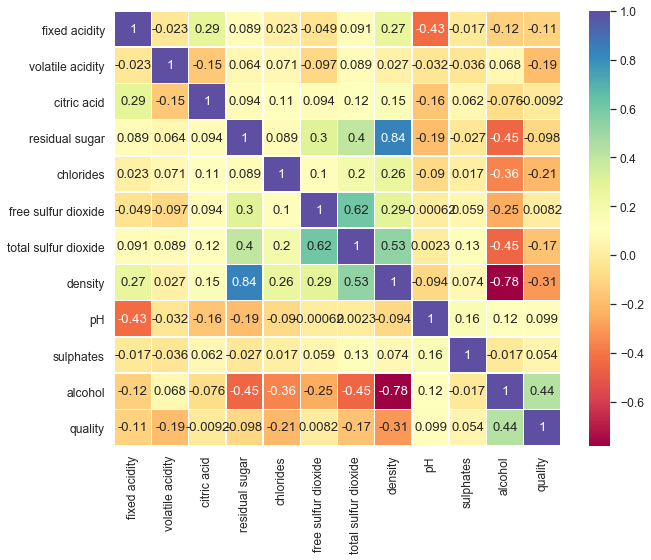

In [130]:
sns.heatmap(white_wine.corr(), annot=True, cmap=colour, linewidths=0.5)

plot.show()


### Method to save images

In [131]:
def saveImage(dataFramePlot, imageName: str, path='.\\Exports\\', extension=".png"):
    if not os.path.isfile(f"{path}{imageName}{extension}"):
        fig = dataFramePlot.get_figure()
        fig.savefig(f"{path}{imageName}{extension}")


### Printing and saving boxplots

In [132]:
def exportBoxPlot(dataToExplore):
    imgPlot = white_wine[dataExploration].plot(kind="box", figsize=(5,10), grid=True)
    saveImage(imgPlot, f"boxPlot_{dataToExplore}")


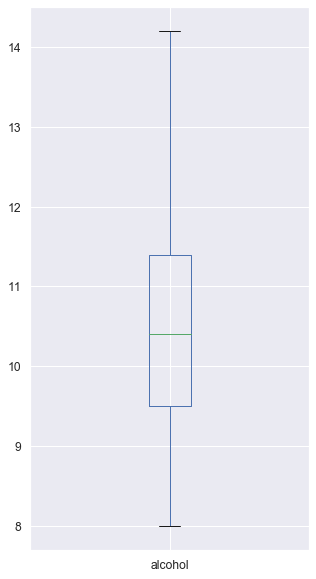

In [133]:
dataExploration = "alcohol"
exportBoxPlot(dataExploration)


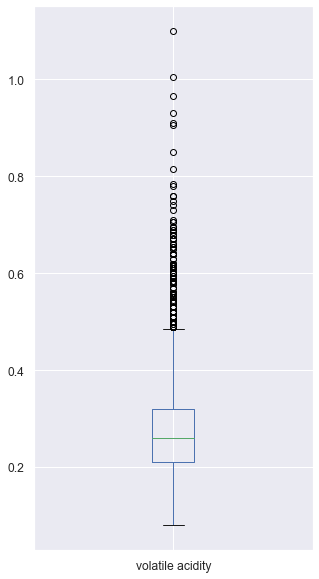

In [134]:
dataExploration = "volatile acidity"
exportBoxPlot(dataExploration)


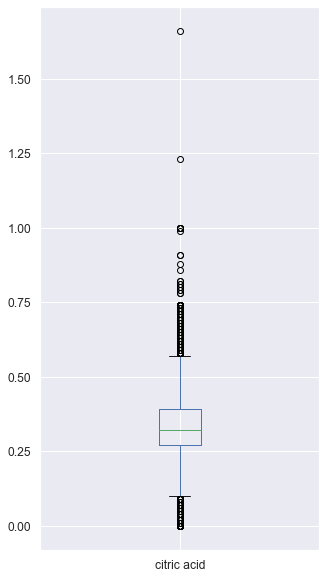

In [135]:
dataExploration = "citric acid"
exportBoxPlot(dataExploration)


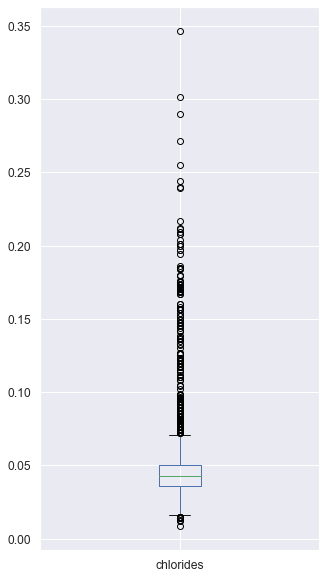

In [136]:
dataExploration = "chlorides"
exportBoxPlot(dataExploration)


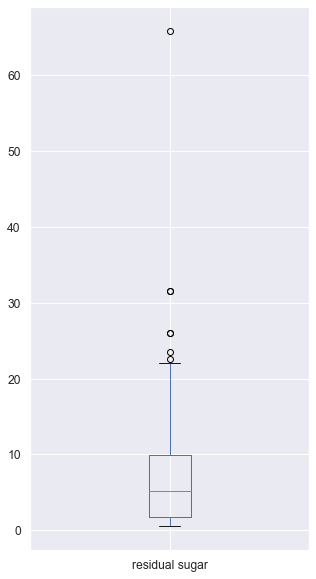

In [137]:
dataExploration = "residual sugar"
exportBoxPlot(dataExploration)


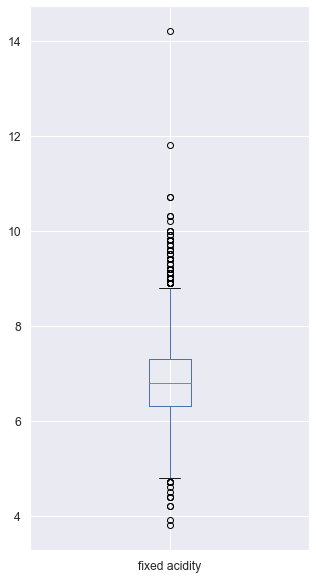

In [138]:
dataExploration = "fixed acidity"
exportBoxPlot(dataExploration)


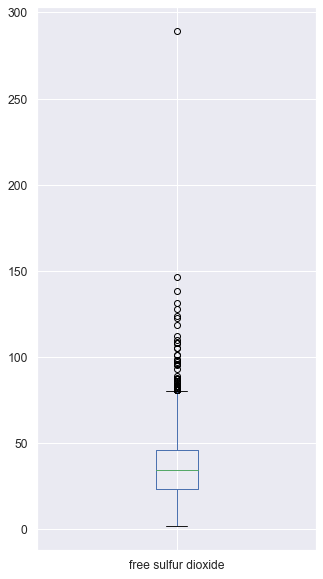

In [139]:
dataExploration = "free sulfur dioxide"
exportBoxPlot(dataExploration)


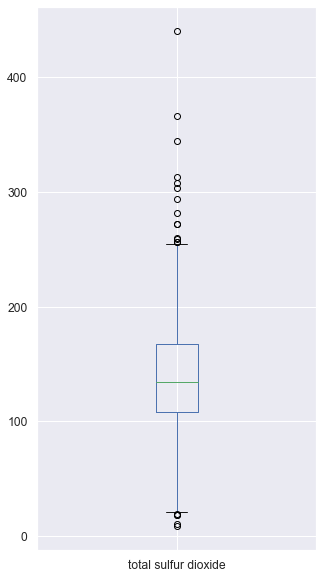

In [140]:
dataExploration = "total sulfur dioxide"
exportBoxPlot(dataExploration)


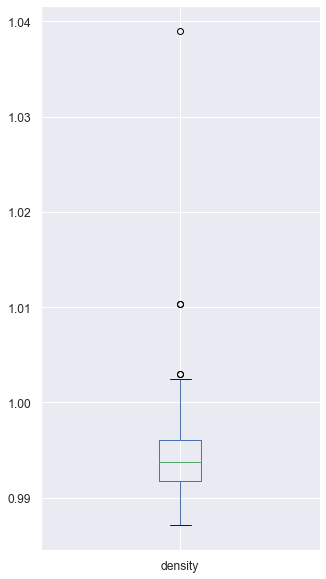

In [141]:
dataExploration = "density"
exportBoxPlot(dataExploration)


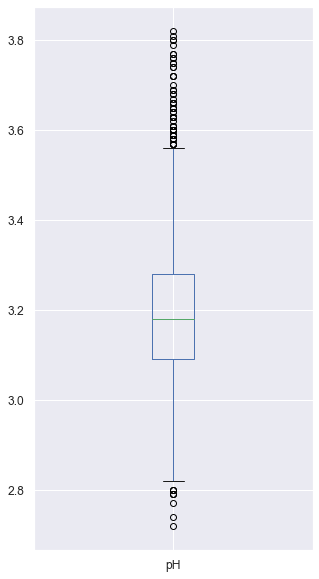

In [142]:
dataExploration = "pH"
exportBoxPlot(dataExploration)


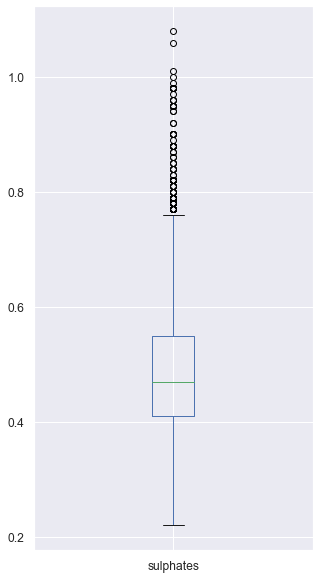

In [143]:
dataExploration = "sulphates"
exportBoxPlot(dataExploration)


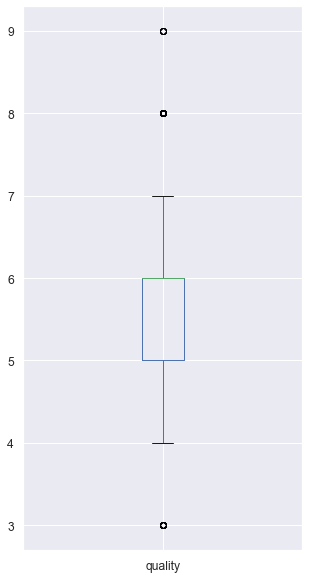

In [144]:
dataExploration = "quality"
exportBoxPlot(dataExploration)


### Correlations about the entire dataset excluding Quality (value to predict)

In [145]:
# analyze correlations excluding qulity (to predict value)
toPredict = "quality"

correlations = white_wine.corr()[toPredict].drop(toPredict)

correlations

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64

### Function to keep in mind only relevant prediction

In [146]:
# def get_features(correlation_threshold):
#     abs_corrs = correlations.abs()
#     high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
#     return high_correlations


In [147]:
# # taking features with correlation more than 0.05 as input x and quality as target variable y 
# features = get_features(0.05) 
# print(features) 
# relevantFeautresDF = white_wine[features] 
# qualitySeries = white_wine[toPredict]


In [148]:
# relevantFeautresDF.plot(kind="scatter", figsize=(5,10), grid=True)


In [149]:
white_wine[toPredict].describe()


count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

### Reduce the prediction size
very good = 1 -> 6:1,7:1,8:1,9:1
not good = 0 -> 3:0,4:0,5:0

In [150]:
labelEncoder = preprocessing.LabelEncoder()

labelEncoder.fit(white_wine[toPredict].astype(float))

list(labelEncoder.classes_)


[3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [151]:
white_wine[toPredict].replace(to_replace={6:1,7:1,8:1,9:1, 3:0,4:0,5:0}, inplace=True)

white_wine.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,1


### Split dataset in predictors and to predict (quality) series

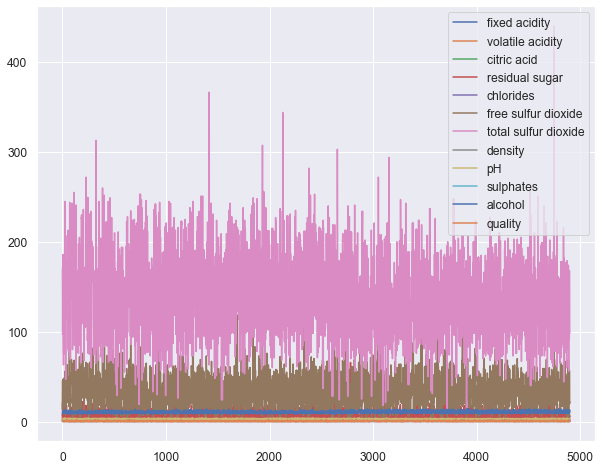

In [152]:
# Predictors
X = white_wine.drop([toPredict], axis=1)

# Value to predict
Y = white_wine[toPredict].astype(int)

white_wine.plot()


In [153]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
dtypes: float64(11)
memory usage: 421.0 KB


In [154]:
X.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [155]:
Y.count()


4898

In [156]:
Y.head()


0    1
1    1
2    1
3    1
4    1
Name: quality, dtype: int32

### Split dataset in train (75%) and test (25%)

In [157]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=5)


In [158]:
print(f"X train {x_train.shape}\nY train {y_train.shape}\n")

print(f"X test {x_test.shape}\nY test {x_test.shape}")


X train (3673, 11)
Y train (3673,)

X test (1225, 11)
Y test (1225, 11)


In [159]:
def print_metrics(y_test, y_pred):
    print('1. Accuracy: {}'.format(round(accuracy_score(y_test, y_pred), 2)))
    print('2. Precision: {}'.format(round(precision_score(y_test, y_pred), 2)))
    print('3. Recall: {}'.format(round(recall_score(y_test, y_pred), 2)))
    print('4. F1 score: {}'.format(round(f1_score(y_test, y_pred), 2)))
    print('5. ROC AUC: {}'.format(round(roc_auc_score(y_test, y_pred), 2)))
    print('\n++ Confusion Matrix ++\n{}'.format(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])))
    


In [160]:
# Data normalization
scaler = MinMaxScaler()

# Train set
x_train_scaled = scaler.fit_transform(x_train)

# Test set
x_test_scaled = scaler.transform(x_test)

### Support Vector Machine (SVC) model and metics

In [161]:
# Trainig SVC
model = SVC().fit(x_train_scaled, y_train)

# SVC prediction
y_pred_svc = model.predict(x_test_scaled)

In [162]:
# SVC metrics'
print_metrics(y_test, y_pred_svc)

1. Accuracy: 0.77
2. Precision: 0.8
3. Recall: 0.88
4. F1 score: 0.84
5. ROC AUC: 0.72

++ Confusion Matrix ++
Predicted    0    1
Actual             
0          224  180
1          100  721


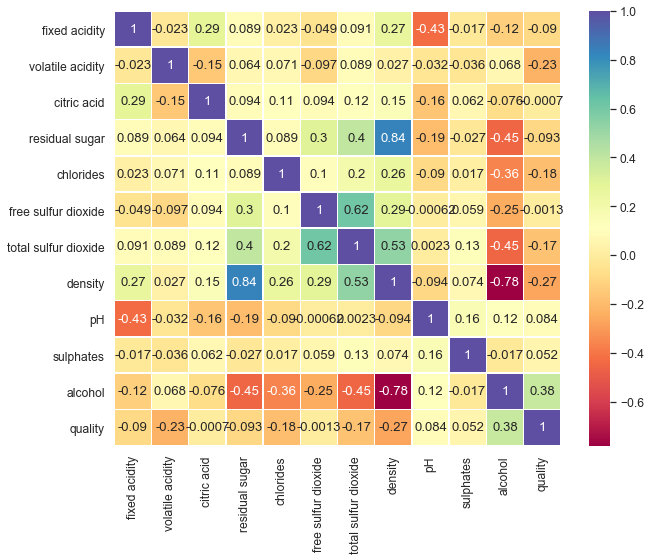

In [163]:
sns.heatmap(white_wine.corr(), annot=True, cmap=colour, linewidths=0.5)
plot.show()

In [164]:
# 1640 samples
print(f"White wine shape's -> Not Good -> {white_wine.loc[white_wine[toPredict] == 0].shape}")

# 3258 samples
print(f"White wine shape's -> Very Good -> {white_wine.loc[white_wine[toPredict] == 1].shape}")


White wine shape's -> Not Good -> (1640, 12)
White wine shape's -> Very Good -> (3258, 12)


### Random Forest model and metics

In [165]:
# Training Random Forest
model = RandomForestClassifier().fit(x_train_scaled, y_train)

# Random Forest prediction
y_pred_rf = model.predict(x_test_scaled)


In [166]:
# Random Forest metrics'

print_metrics(y_test, y_pred_rf)

1. Accuracy: 0.83
2. Precision: 0.86
3. Recall: 0.9
4. F1 score: 0.88
5. ROC AUC: 0.8

++ Confusion Matrix ++
Predicted    0    1
Actual             
0          280  124
1           83  738


### K-nearest neighbors (KNN) model and metics

In [198]:
# Training KNN (200)
model = KNeighborsClassifier(n_neighbors=200).fit(x_train_scaled, y_train)

# KNN prediction
y_pred_knn = model.predict(x_test_scaled)

In [199]:
# KNN metrics'

print_metrics(y_test, y_pred_rf)

1. Accuracy: 0.82
2. Precision: 0.84
3. Recall: 0.9
4. F1 score: 0.87
5. ROC AUC: 0.78

++ Confusion Matrix ++
Predicted    0     1
Actual              
0          426   224
1          129  1181


In [202]:
# Training KNN (10)
model = KNeighborsClassifier(n_neighbors=10).fit(x_train_scaled, y_train)

# KNN prediction
y_pred_knn = model.predict(x_test_scaled)

In [203]:
# KNN metrics'

print_metrics(y_test, y_pred_rf)

1. Accuracy: 0.82
2. Precision: 0.84
3. Recall: 0.9
4. F1 score: 0.87
5. ROC AUC: 0.78

++ Confusion Matrix ++
Predicted    0     1
Actual              
0          426   224
1          129  1181


### Final plots and models comparsion

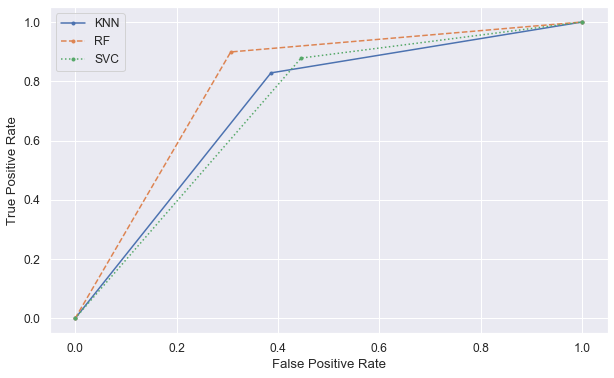

In [171]:
svc_fpr, svc_tpr, svc_th = roc_curve(y_test, y_pred_svc)
rf_fpr, rf_tpr, rf_th = roc_curve(y_test, y_pred_rf)
knn_fpr, knn_tpr, knn_th = roc_curve(y_test, y_pred_knn)

# plot the roc curve for the model
plot.figure(figsize=(10,6))
plot.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
plot.plot(rf_fpr, rf_tpr, marker='.', linestyle='--', label='RF')
plot.plot(svc_fpr, svc_tpr, marker='.', linestyle=':', label='SVC')

# axis labels
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')

# show the legend
plot.legend()

# show the plot
plot.show()


### Split dataset in train (60%) and test (40%)

In [184]:
# Predictors
X = white_wine.drop([toPredict], axis=1)

# Value to predict
Y = white_wine[toPredict].astype(int)

# Split train & test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=5)

In [185]:
print(f"X train {x_train.shape}\nY train {y_train.shape}\n")

print(f"X test {x_test.shape}\nY test {x_test.shape}")


X train (2938, 11)
Y train (2938,)

X test (1960, 11)
Y test (1960, 11)


In [186]:
# Data normalization
scaler = MinMaxScaler()

# Train set
x_train_scaled = scaler.fit_transform(x_train)

# Test set
x_test_scaled = scaler.transform(x_test)

### Support Vector Machine (SVC) model and metics

In [187]:
# Trainig SVC
model = SVC().fit(x_train_scaled, y_train)

# SVC prediction
y_pred_svc = model.predict(x_test_scaled)

In [188]:
# SVC metrics'
print_metrics(y_test, y_pred_svc)

1. Accuracy: 0.77
2. Precision: 0.79
3. Recall: 0.89
4. F1 score: 0.84
5. ROC AUC: 0.71

++ Confusion Matrix ++
Predicted    0     1
Actual              
0          347   303
1          150  1160


### Random Forest model and metics

In [189]:
# Training Random Forest
model = RandomForestClassifier().fit(x_train_scaled, y_train)

# Random Forest prediction
y_pred_rf = model.predict(x_test_scaled)


In [190]:
# Random Forest metrics'

print_metrics(y_test, y_pred_rf)

1. Accuracy: 0.82
2. Precision: 0.84
3. Recall: 0.9
4. F1 score: 0.87
5. ROC AUC: 0.78

++ Confusion Matrix ++
Predicted    0     1
Actual              
0          426   224
1          129  1181


### K-nearest neighbors (KNN) model and metics

In [196]:
# Training KNN (200)
model = KNeighborsClassifier(n_neighbors=200).fit(x_train_scaled, y_train)

# KNN prediction
y_pred_knn = model.predict(x_test_scaled)

In [197]:
# KNN metrics'

print_metrics(y_test, y_pred_rf)

1. Accuracy: 0.82
2. Precision: 0.84
3. Recall: 0.9
4. F1 score: 0.87
5. ROC AUC: 0.78

++ Confusion Matrix ++
Predicted    0     1
Actual              
0          426   224
1          129  1181


In [193]:
# Training KNN (10)
model = KNeighborsClassifier(n_neighbors=10).fit(x_train_scaled, y_train)

# KNN prediction
y_pred_knn = model.predict(x_test_scaled)

In [194]:
# KNN metrics'

print_metrics(y_test, y_pred_rf)

1. Accuracy: 0.82
2. Precision: 0.84
3. Recall: 0.9
4. F1 score: 0.87
5. ROC AUC: 0.78

++ Confusion Matrix ++
Predicted    0     1
Actual              
0          426   224
1          129  1181


### Final plots and models comparsion

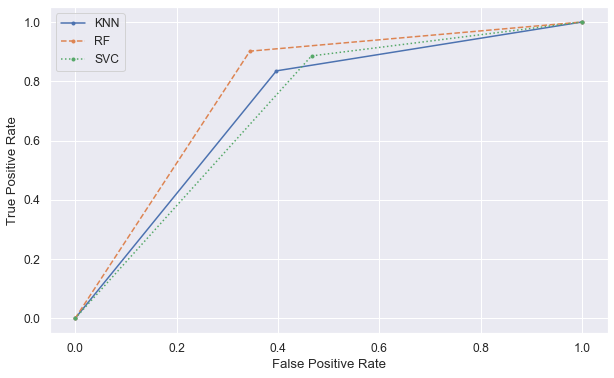

In [195]:
svc_fpr, svc_tpr, svc_th = roc_curve(y_test, y_pred_svc)
rf_fpr, rf_tpr, rf_th = roc_curve(y_test, y_pred_rf)
knn_fpr, knn_tpr, knn_th = roc_curve(y_test, y_pred_knn)

# plot the roc curve for the model
plot.figure(figsize=(10,6))
plot.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
plot.plot(rf_fpr, rf_tpr, marker='.', linestyle='--', label='RF')
plot.plot(svc_fpr, svc_tpr, marker='.', linestyle=':', label='SVC')

# axis labels
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')

# show the legend
plot.legend()

# show the plot
plot.show()
